In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from collections import defaultdict

In [2]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [3]:
dataset=dataset.drop(['id', 'Unnamed: 0'], axis=1)

In [4]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [5]:
# Assuming df is your original DataFrame with a column named "genre"

# Define a function to assign class labels
def assign_class(genre):
    if genre in ['Hip hop', 'house', 'Black metal', 'techno', 'electronic', 
                 'Hard rock', 'heavy-metal', 'metal', 'rock', 'reggaeton']:
        return 1  # Agitato
    elif genre in ['ambient', 'sleep', 'study', 'sad', 'romance', 'chill', 
                   'classical', 'piano', 'opera', 'acoustic']:
        return 0  # Lento
    else:
        return None  # Unknown or other genre

# Add a new column "class" to the original DataFrame
dataset['class'] = dataset['genre'].apply(assign_class)

# Drop rows with unknown or other genres
dataset.dropna(subset=['class'], inplace=True)

# Convert the "class" column to integer type
dataset['class'] = dataset['class'].astype(int)

dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist,class
2016,Closer,1.0,244.96,False,86.0,1.0,The Chainsmokers;Halsey,single,Closer,2016-07-29,...,95.01,4.0,0.31,1.00,0.64,0.62,94.0,house,"[78.0, 80.0]",1
2017,Goosebumps - Remix,1.0,162.80,True,81.0,1.0,Travis Scott;HVME,single,Goosebumps (Remix),2021-01-15,...,124.92,4.0,0.78,1.00,0.30,0.54,83.0,house,"[94.0, 62.0]",1
2018,One Kiss (with Dua Lipa),1.0,214.85,False,88.0,1.0,Calvin Harris;Dua Lipa,single,One Kiss (with Dua Lipa),2018-04-06,...,123.99,4.0,0.93,1.00,0.63,0.62,108.0,house,"[84.0, 86.0]",1
2019,On My Way,1.0,193.80,True,75.0,1.0,Alan Walker;Sabrina Carpenter;Farruko,single,On My Way,2019-03-21,...,170.09,4.0,0.04,1.00,0.36,0.63,136.0,house,"[79.0, 76.0, 82.0]",1
2020,Happier,1.0,214.29,False,85.0,1.0,Marshmello;Bastille,single,Happier,2018-08-17,...,100.02,4.0,0.31,0.99,0.56,0.59,88.0,house,"[81.0, 72.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,Draw A Crowd,1.0,254.35,False,30.0,6.0,Ben Folds Five,album,The Sound Of The Life Of The Mind,2012-09-18,...,112.21,4.0,0.84,1.00,0.43,0.57,117.0,piano,[43.0],0
99493,Father in Heaven,2.0,147.63,False,29.0,8.0,Paul Cardall,album,40 Hymns for Forty Days,2015-04-14,...,76.49,4.0,0.28,0.11,0.55,0.66,46.0,piano,[48.0],0
99494,Baby Lullaby,1.0,188.00,False,30.0,11.0,Piano Peace,album,Baby Lullaby Piano Sleep Music,2017-03-10,...,69.49,5.0,0.26,0.62,0.85,0.87,78.0,piano,[61.0],0
99495,Young Man's Fancy,1.0,231.58,False,19.0,14.0,George Winston,album,Linus & Lucy - The Music of Vince Guaraldi,1996-09-07,...,76.22,4.0,0.09,0.82,0.31,0.41,67.0,piano,[47.0],0


In [6]:
y=dataset["class"]

In [7]:
# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
dataset['popularity_artist'] = dataset['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
dataset['popularity_artist'] = round(dataset['popularity_artist'].apply(np.mean),2)


In [8]:
X=dataset.drop(['class', 'name', 'explicit', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'mode_confidence', 'genre'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72)

In [10]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [11]:
class0 = dataset[dataset["class"]==0]
class1 =  dataset[dataset["class"]==1]

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [13]:

# Define the range of values to search over for each parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'dual':[True, False],
    'max_iter': [2000, 3000, 4000],    #1000 già provato
    'tol': [0.001, 0.1, 0.01],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = LinearSVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best mean cross-validated score:", best_score)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best parameters: {'C': 10, 'dual': True, 'max_iter': 2000, 'tol': 0.01}
Best mean cross-validated score: 0.8910375604313872


c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
svm = LinearSVC(**best_params)
svm.fit(X_train_norm, y_train)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, dual=True, max_iter=2000, tol=0.01)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.888459250446163
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      1986
           1       0.84      0.91      0.87      1376

    accuracy                           0.89      3362
   macro avg       0.88      0.89      0.89      3362
weighted avg       0.89      0.89      0.89      3362

Confusion Matrix:
 [[1741  245]
 [ 130 1246]]


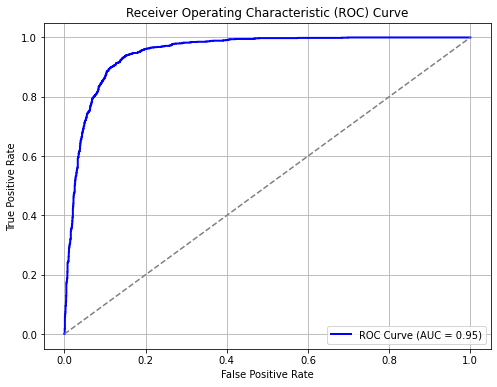

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get decision function scores
y_scores = svm.decision_function(X_test_norm)

# Convert decision function scores to probabilities using a sigmoid function
# Note: SVM's decision_function doesn't output probabilities directly, so we need to calibrate them
# You can use the calibration_curve function from sklearn.calibration to calibrate them, but here we'll use a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_prob = sigmoid(y_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


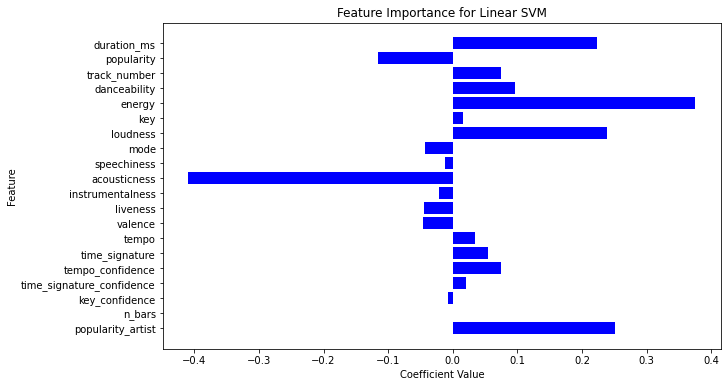

In [27]:
# Assuming you have trained a linear SVM classifier named 'svm'

# Extract feature coefficients
coefficients = svm.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()


# SVM Non linear

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [28]:
# Define the range of values to search over for each parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best mean cross-validated score:", best_score)

Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean cross-validated score: 0.9106731126812943


In [30]:
svm = SVC(**best_params)
svm.fit(X_train_norm, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9098750743604997
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1986
           1       0.87      0.92      0.89      1376

    accuracy                           0.91      3362
   macro avg       0.90      0.91      0.91      3362
weighted avg       0.91      0.91      0.91      3362

Confusion Matrix:
 [[1792  194]
 [ 109 1267]]


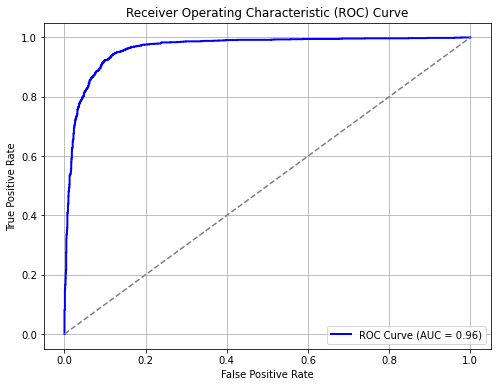

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get decision function scores
y_scores = svm.decision_function(X_test_norm)

# Convert decision function scores to probabilities using a sigmoid function
# Note: SVM's decision_function doesn't output probabilities directly, so we need to calibrate them
# You can use the calibration_curve function from sklearn.calibration to calibrate them, but here we'll use a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_prob = sigmoid(y_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [36]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(svm, X_test_norm, y_test, n_repeats=5, random_state=42)

# Get feature names
feature_names = X_test.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='red')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Non-linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest importance at the top
plt.show()
